In [5]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from browser import *

In [12]:
TUNABLE = ['m_groups', 'k_winners', 'eps', 'fpartition', 'forget_mu', 'boost_strength', 'boost_strength_factor']
NUMERIC_TUNABLE = ['m_groups', 'k_winners', 'eps', 'forget_mu', 'boost_strength', 'boost_strength_factor']

In [7]:
exps = [
    'Flat_PTB_Explore',
    'Flat_PTB_Snipe',
    'Flat_PTB_Snipe2',
]

paths = [os.path.expanduser("~/s3_jgordon/ray/results/{}".format(e)) for e in exps]
df = load_many(paths)

Loaded 96 experiments


In [13]:
df.loc[~df.k_winners_pct.isnull(), 'k_winners'] = df.k_winners_pct * df.m_groups
df.k_winners = df.k_winners.astype(int)

for tp in TUNABLE:
    if tp not in df:
        df[tp] = None
        
df.fillna(value={
    'forget_mu': 0.0,
    'dropout_p': 0.0,
    'balance_part_winners': False
}, inplace=True)


In [14]:
def scatter_all_tunable(df, params=NUMERIC_TUNABLE, ppl_cutoff=220):
    fig, axs = plt.subplots(len(params), 1, figsize=(8, 14), 
                            dpi=144, 
                            gridspec_kw={'hspace': 0.7})
    for ax, p in zip(axs, params):
        df[df.val_pred_ppl_min <= ppl_cutoff].plot(kind='scatter', x=p, y='val_pred_ppl_min', c='train_pred_ppl_min', colormap='viridis', ax=ax)
        ax.set_title("%s vs min val PPL" % p)
    plt.show()

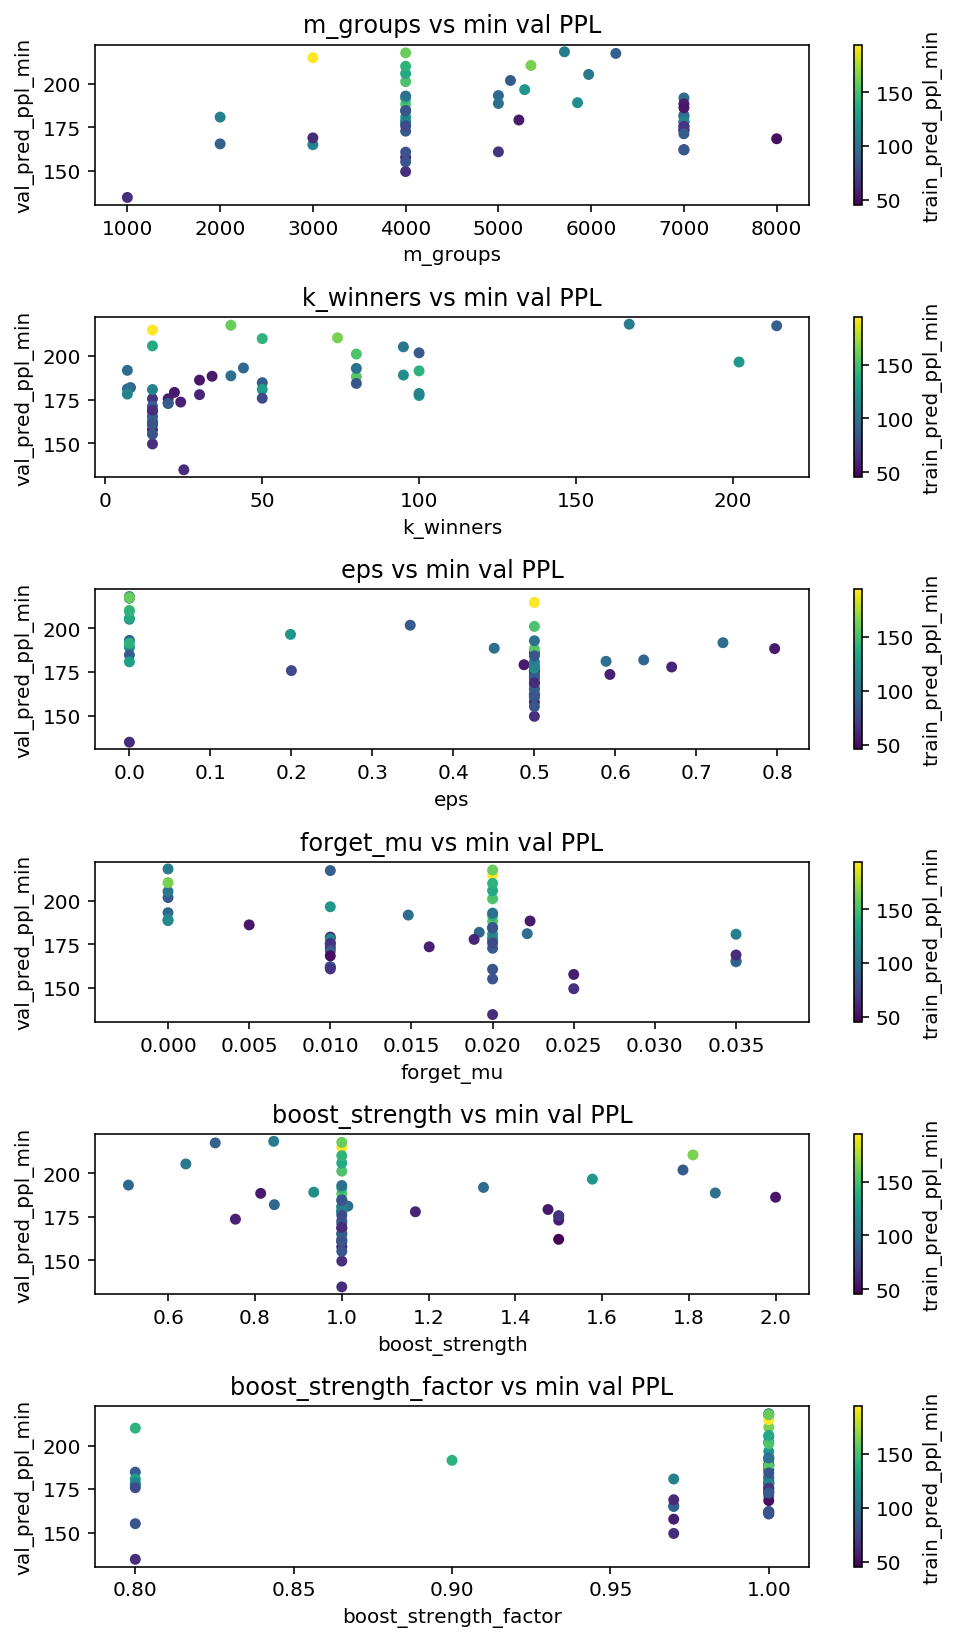

In [15]:
scatter_all_tunable(df)

### Without Embedding

In [20]:
df[df.embedding_kind.isnull()].sort_values('val_pred_ppl_min')[TUNABLE + ['weight_sparsity', 'x_b_norm', 'balance_part_winners', 'mult_integration', 'embedding_kind'] + 
                                   ['val_pred_ppl_min', 'val_pred_acc_max', 'train_pred_ppl_min', 'epoch_val_pred_ppl']]

,m_groups,k_winners,eps,fpartition,forget_mu,boost_strength,boost_strength_factor,weight_sparsity,x_b_norm,balance_part_winners,mult_integration,embedding_kind,val_pred_ppl_min,val_pred_acc_max,train_pred_ppl_min,epoch_val_pred_ppl
86,4000,15,0.500000,0.9,0.025000,1.000000,0.97,None,True,False,True,NaN,149.533360,23.207171,65.229777,50
90,4000,15,0.500000,0.9,0.020000,1.000000,0.80,None,True,True,True,NaN,155.133020,22.570667,84.297827,47
49,4000,15,0.500000,0.8,0.025000,1.000000,0.97,None,True,False,True,NaN,157.728945,22.343958,57.851861,45
57,4000,15,0.500000,0.9,0.020000,1.000000,1.00,None,True,True,True,NaN,160.709427,22.469333,84.384822,45
48,5000,15,0.500000,0.85,0.010000,1.000000,1.00,0.3,True,False,True,NaN,160.872428,22.691899,68.133196,55
43,7000,15,0.500000,0.85,0.010000,1.500000,1.00,NaN,False,False,True,NaN,162.030516,22.363878,45.408591,11
47,7000,15,0.500000,0.85,0.010000,1.000000,1.00,0.3,True,False,True,NaN,162.083793,22.406375,86.599488,54
50,3000,15,0.500000,0.85,0.035000,1.000000,0.97,None,True,False,True,NaN,164.965017,22.027888,110.877298,30
51,2000,15,0.500000,0.5,0.035000,1.000000,0.97,None,True,False,True,NaN,165.441337,22.013280,89.712456,36
45,8000,15,0.500000,0.8,0.010000,1.000000,1.00,NaN,True,False,True,NaN,168.384175,21.865870,50.688927,34


### With embedding

In [21]:
df[~df.embedding_kind.isnull()].sort_values('val_pred_ppl_min')[TUNABLE + ['weight_sparsity', 'x_b_norm', 'balance_part_winners', 'mult_integration', 'embedding_kind'] + 
                                   ['val_pred_ppl_min', 'val_pred_acc_max', 'train_pred_ppl_min', 'epoch_val_pred_ppl']]

,m_groups,k_winners,eps,fpartition,forget_mu,boost_strength,boost_strength_factor,weight_sparsity,x_b_norm,balance_part_winners,mult_integration,embedding_kind,val_pred_ppl_min,val_pred_acc_max,train_pred_ppl_min,epoch_val_pred_ppl
36,1000,25,0.00,None,0.02,1.0,0.8,None,True,False,False,ptb_fasttext,134.686125,23.059259,65.109254,23
81,4000,100,0.50,None,0.02,1.0,0.8,None,False,False,False,ptb_fasttext,177.360827,20.409877,123.929287,32
84,4000,100,0.50,None,0.02,1.0,0.8,None,False,False,False,ptb_fasttext,178.504244,20.375309,111.730235,47
75,4000,50,0.00,0.35,0.02,1.0,0.8,None,False,False,True,glove,180.837370,21.213580,128.259115,70
78,4000,100,0.00,0.35,0.02,1.0,0.9,None,False,False,False,glove,191.500516,21.032099,141.036298,30
94,5000,50,0.50,0.35,0.02,1.0,1.0,None,False,True,True,glove,248.209167,18.882716,250.072538,9
82,4000,100,0.50,None,0.02,1.0,0.8,None,False,False,False,ptb_fasttext,285.422338,18.162963,296.663770,2
76,4000,100,0.85,None,0.02,1.0,0.8,None,False,False,False,glove,288.996243,14.880247,273.512578,23
77,4000,100,0.00,0.35,0.02,1.0,0.9,None,False,False,False,glove,291.829646,18.622222,323.001734,3
93,5000,50,0.50,0.35,0.02,1.0,1.0,None,False,True,True,glove,434.616214,13.854321,547.006341,0


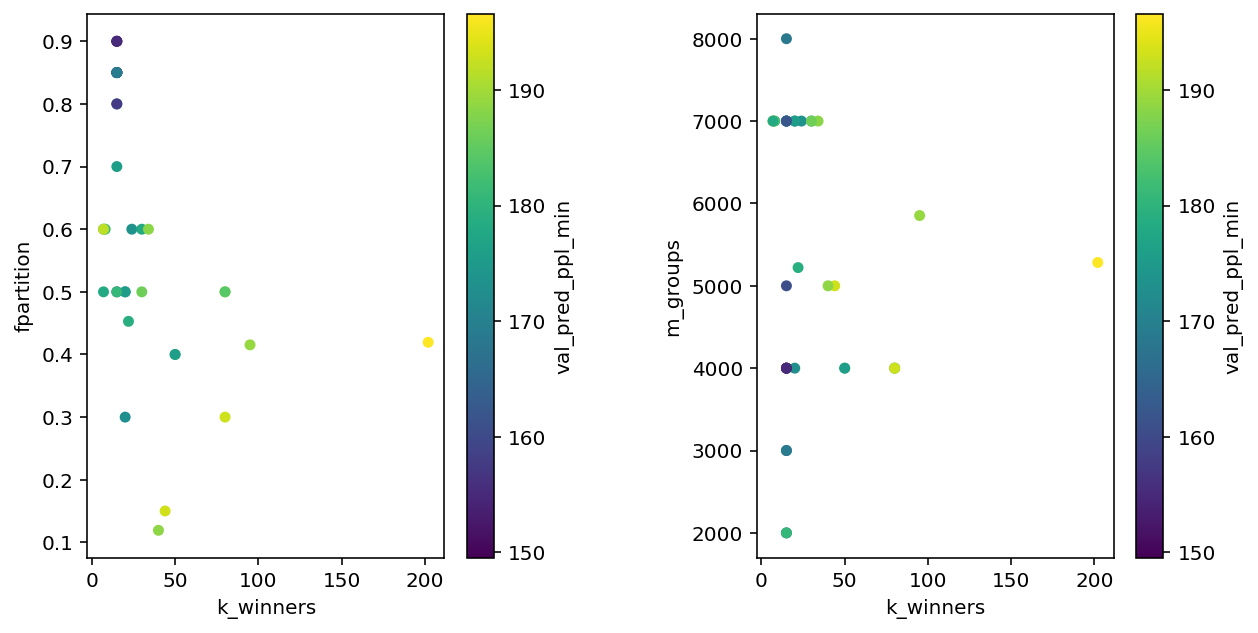

In [41]:
fig, axs = plt.subplots(1, 2, dpi=144, figsize=(10, 5), gridspec_kw={'wspace': 0.5})
df[df.val_pred_ppl_min < 200].plot(kind='scatter', x='k_winners', y='fpartition', c='val_pred_ppl_min', colormap='viridis', ax=axs[0])
df[df.val_pred_ppl_min < 200].plot(kind='scatter', x='k_winners', y='m_groups', c='val_pred_ppl_min', colormap='viridis', ax=axs[1])
plt.show()

Text(0.5, 1.0, 'Normalization slows down time-to-peak')

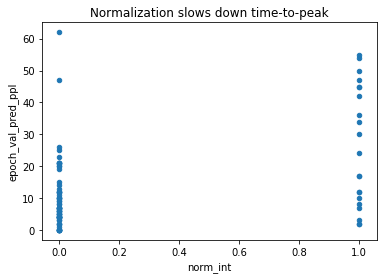

In [42]:
df['norm_int'] = 0
df.loc[df.x_b_norm, 'norm_int'] = 1
df.plot(kind='scatter', x='norm_int', y='epoch_val_pred_ppl')
plt.title("Normalization slows down time-to-peak")